# Profitable App Profiles for the iOS App Store and Google Play Markets 

#### By Jeri Stewart
---

### Table of Contents
---
1. [Introduction](#Introdction)
2. [Objective](#Objective)
3. [Background](#Background)
4. [Exploring the Data](#Exploring_the_Data)
5. [Cleaning the Data](#Cleaning_the_Data)
6. [Most Common Apps by Genre](#Most_Common_Apps_by_Genre)
7. [Most Popular Apps by Genre on the App Store](#Most_Popular_Apps)
8. [Most Popular Apps by Genre on Google Play](#Most_Popular_Google)
9. [Conclusion](#Conclusion)

<a id='Introduction'></a>

### 1. Introduction
---
Working as a data analyst for a compnay that builds free for download Android and iOS mobile apps in which its main source of revenue is its in-app ads. The number of users for each app determines the revenue for any given app.


<a id='Objective'></a>
### 2. Objective
---
The goal is to analyze data  from Google Play and the App Store to help the developers to understand that type of apps are likely to attract more users. 
I will demonstrate process for a data sciecne workflow:
  * clarifying goal for the project
  * collect relevant data
  * clean data and prepare for analysis
  * analyze clean data

<a id='Background'></a>

### 3. Background
---
As of September 2018, there were approximately 2 million iOS apps available on the App Store and 2.1 million Android apps available on Google Play (Statista 2018).

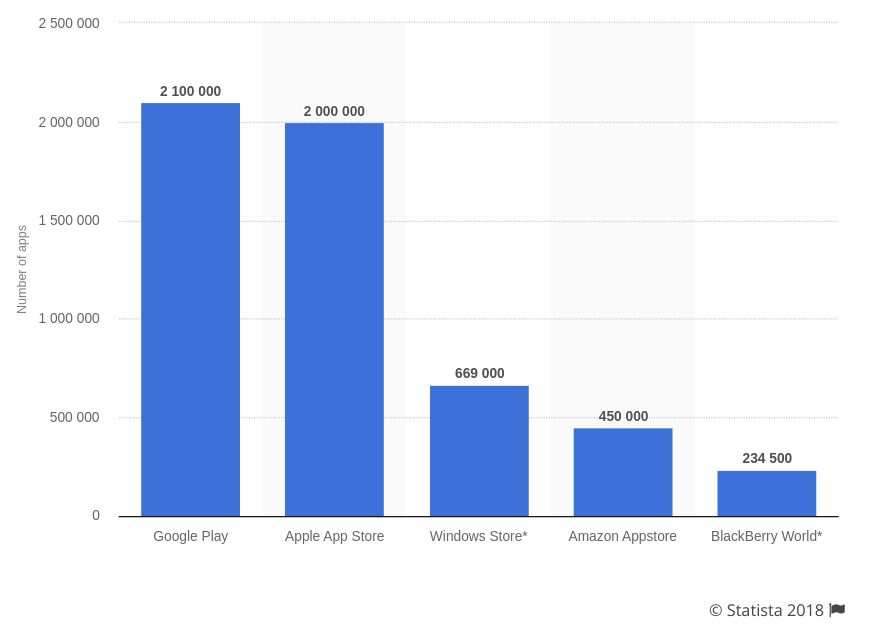

For this project, I will be utilizing two datasets:
> * [Google Play dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps) collected in August 2018 contains data about approximately 10,000 Android apps.
> * [App Store dataset](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps) collected in July 2017 contains data about approximately 7,000 iOS apps

<a id='Exploring_the_Data'></a>

Exploring the Data
---
For this section, the datasets will be opened and explored to get a better understanding of the datasets that will be utilized.


In [4]:
# Step 1 - create function to explore the dataset to repeatedly print rows in a readable way

def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [5]:
# Step 2 - open datasets

from csv import reader

# The Google Play Dataset 
opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

# The App Store Dataset 
opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

In [6]:
# Step 3 explore the datasets

# Google Play Dataset
explore_data(android, 0, 3, True)
print('Column Names')
print(android_header)
      

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13
Column Names
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [7]:
# App Store Dataset
explore_data(ios, 0, 3, True)
print('Column Names')
print(ios_header)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16
Column Names
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


#### Summary 

Identfied useful columns for data analysis from using explore_data function in conjunction with the dataset documentation (see [Background](#Background)) for less intutitive column names:
> __Google Play:__ From the analysis, the useful columns are: `App`, `Category`, `Reviews`, `Installs`, `Type`, `Price`, and `Genres`.

> __App Store:__ From the analysis, the useful columns are: `track name`, `currency`, `price`, and `rating_count_tot` `rating_count_ver`, and `prime_genre`.

<a id='Cleaning_the_Data'></a>
### 5. Cleaning the Data
---
For this section, the datasets will be screened for inaccurate or duplicate data. The inaccurate data will be corrected or remove and any duplicates will be removed.


The Google Play data set has dedicated [discussion section](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion) in which one the discussion describes an error for a certain [row](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/66015).

In [8]:
# Confirm  incorrect row entry
print(android_header)
print(android[10472]) #Discussion indicates entry 10472 is incorrect

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


The row 10472 corresponds to the app Life Made WI-Fi Touchscreen Photo Frame, and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play app is 5. So the `Category` column is missing  and the `Genres` column is missing data.

In [9]:
# delete row with missing data
print(len(android))
del android[10472]
print(len(android))

10841
10840


> ###### Removing Duplicate entries

By exploring the datasets, I've found that some apps have more than one entry. For instance, the application Instagram has four entries:

In [10]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


To get a better understanding of all potential duplicate apps, I will utilize a for loop.

In [21]:
duplicate_and = []
unique_and = []

for app in android:
    name = app[0]
    if name in unique_and:
        duplicate_and.append(name)
    else:
        unique_and.append(name)
    
print('Number of andriod duplicate apps:', len(duplicate_and))
print('\n')
print('Examples of andriod duplicate apps:', duplicate_and[:15])

duplicate_ios = []
unique_ios = []

for app in ios:
    name = app[0]
    if name in unique_ios:
        duplicate_ios.append(name)
    else:
        unique_ios.append(name)
print('\n')       
print('Number of ios duplicate apps:', len(duplicate_ios))
print('\n')
print('Examples of ios duplicate apps:', duplicate_ios[:15])

Number of andriod duplicate apps: 1181


Examples of andriod duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


Number of ios duplicate apps: 0


Examples of ios duplicate apps: []


* In total, there are __1,181 cases__ where an __andriod app__ occurs more than once.
* In total, there are __0 cases__ where an __iOS app__ occurs more than once.

From the Instragram rows above, I've found that the only difference between the rows is the number of reviews. Perhaps the entries were created a different time points. 
In order to determine which apps to remove:
> * I will build a dictionary where each key will be an app name and the value will be the number of reviews
> * The dictionary will contain one entry per unique app by keeping the highest review count

In [12]:
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

In [13]:
print('Expected length:', len(android) - 1181) #length of dictionary should total number subtracted by number of duplicates
print('Actual length:', len(reviews_max))

Expected length: 9659
Actual length: 9659


The `reviews_max` dictionary will be used to remove duplicates from our dataset:

- Start by initializing two empty lists, `android_clean` and `already_added`.
- loop through the `android` data set, and for every iteration:
    - We isolate the name of the app and the number of reviews.
    - add the current row (`app`) to the `android_clean` list, and the app name (`name`) to the `already_added` list if:
        - The number of reviews of the current app matches the number of reviews of that app as described in the `reviews_max` dictionary; and
        - The name of the app is not already in the `already_added` list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for `reviews_max[name] == n_reviews`, we'll still end up with duplicate entries for some apps.

In [14]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name) # make sure this is inside the if block

In [15]:
#confirm number of rows in updated data set is equal to 9,659
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


> ##### Removing Non-English apps

For this section, I will be removing any non-english apps by creating a function that detects text not used commonly used in english text.
- Characters specific to english text are encoded usign the ASCII standard in which each character has a corresponging number between 0 and 127


In [22]:
# Discussion section mentioned data with non-english text
print(android_clean[4412][0])
print(android_clean[7940][0])
print(ios[813][1])
print(ios[6731][1])

#Create function to determine english text
def is_english(string):
    
    for character in string:
        if ord(character) > 127:
            return False
    
    return True

# Test function 
print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

中国語 AQリスニング
لعبة تقدر تربح DZ
爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
True
False


The function seems to work fine however, it might give an incorrect result for app names with emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside the ASCII range.

In [17]:
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

False
False
8482
128540


In order to minimize loss of useful data, the funciton will be updated to check for app name names with more than 3 non-ACSII characters.

In [18]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
True


In [23]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[1]
    if is_english(name):
        ios_english.append(app)
        
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


Number of rows: 9117
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '3

> ###### Isolating Free Apps

In [24]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)
        
print(len(android_final))
print(len(ios_final))

8408
2922


For analysis, we have __8,864__ andriod apps and __3,222__ iOS apps 

<a id='Most_Common_Apps_by_Genre'></a>
### 6. Most Common Apps by Genre
---

As previously mentioned, our aim is to determine apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

> 1. Build a minimal Android version of the app, and add it to Google Play.
> 2. If the app has a good response from users, we then develop it further.
> 3. If the app is profitable after six months, we also build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both the App Store and Google Play, we need to find app profiles that are successful on both markets. For instance, a profile that might work well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table for the prime_genre column of the App Store data set, and the Genres and Category columns of the Google Play data set.

I will proceed by building two functions to analyze the frequency tables:
  * One function to generate frequenct table sthat show percentages
  * Another fucntion that we can use to display the percentages in descending order


In [25]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

In [26]:
#Examine frequency table for the orime_genre column in teh App Store data set
display_table(ios_final, -5)

Games : 59.171800136892536
Entertainment : 7.529089664613278
Photo & Video : 5.133470225872689
Education : 3.8329911019849416
Social Networking : 3.1143052703627654
Shopping : 2.4982888432580426
Utilities : 2.2587268993839835
Music : 2.1560574948665296
Sports : 2.0533880903490758
Health & Fitness : 1.9849418206707734
Productivity : 1.7111567419575633
Lifestyle : 1.4715947980835045
News : 1.3347022587268993
Travel : 1.1293634496919918
Finance : 1.0951403148528405
Weather : 0.8898015058179329
Food & Drink : 0.8898015058179329
Reference : 0.5133470225872689
Business : 0.5133470225872689
Book : 0.2737850787132101
Medical : 0.20533880903490762
Navigation : 0.13689253935660506
Catalogs : 0.10266940451745381


Among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps at approx. 5%.  Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set 

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

Let's continue by examining the `Genres` and `Category` columns of the Google Play data set (two columns which seem to be related).

In [27]:
display_table(android_final, 1) # Category

FAMILY : 18.803520456707897
GAME : 9.60989533777355
TOOLS : 8.575166508087536
BUSINESS : 4.709800190294957
PRODUCTIVITY : 3.9724072312083734
LIFESTYLE : 3.8891531874405327
FINANCE : 3.73453853472883
MEDICAL : 3.6393910561370126
PERSONALIZATION : 3.306374881065652
SPORTS : 3.258801141769743
COMMUNICATION : 3.2231208372978117
HEALTH_AND_FITNESS : 3.1279733587059946
PHOTOGRAPHY : 3.0090390104662226
NEWS_AND_MAGAZINES : 2.7949571836346334
SOCIAL : 2.664129400570885
TRAVEL_AND_LOCAL : 2.3073263558515698
SHOPPING : 2.247859181731684
BOOKS_AND_REFERENCE : 2.1883920076117986
DATING : 1.8315889628924835
VIDEO_PLAYERS : 1.7602283539486203
MAPS_AND_NAVIGATION : 1.3558515699333968
FOOD_AND_DRINK : 1.2012369172216937
EDUCATION : 1.165556612749762
ENTERTAINMENT : 0.939581351094196
AUTO_AND_VEHICLES : 0.939581351094196
LIBRARIES_AND_DEMO : 0.9039010466222646
HOUSE_AND_HOME : 0.8087535680304472
WEATHER : 0.7968601332064701
EVENTS : 0.7136060894386299
ART_AND_DESIGN : 0.6660323501427212
PARENTING : 0.6

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further by going to hte google play app store, we can see that the family category (which accounts for almost 19% of the apps)consists of mostly games for kids.

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [28]:
display_table(android_final, -4)

Tools : 8.563273073263558
Entertainment : 6.089438629876309
Education : 5.387725975261656
Business : 4.709800190294957
Productivity : 3.9724072312083734
Lifestyle : 3.8772597526165553
Finance : 3.73453853472883
Medical : 3.6393910561370126
Sports : 3.3301617507136063
Personalization : 3.306374881065652
Communication : 3.2231208372978117
Health & Fitness : 3.1279733587059946
Action : 3.116079923882017
Photography : 3.0090390104662226
News & Magazines : 2.7949571836346334
Social : 2.664129400570885
Travel & Local : 2.3073263558515698
Shopping : 2.247859181731684
Books & Reference : 2.1883920076117986
Simulation : 2.0813510941960036
Dating : 1.8315889628924835
Arcade : 1.8315889628924835
Casual : 1.7721217887725977
Video Players & Editors : 1.736441484300666
Maps & Navigation : 1.3558515699333968
Food & Drink : 1.2012369172216937
Puzzle : 1.1298763082778307
Racing : 1.0228353948620361
Role Playing : 0.939581351094196
Auto & Vehicles : 0.939581351094196
Strategy : 0.9039010466222646
Librar

The difference between the `Genres` and the `Category` columns is not so distinct, however the `Genres` column is more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the `Category` column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

<a id='Most_Popular_Apps'></a>
### 7. Most Popular Apps by Genre on the App Store

One way to calculate which genres are the most popular (or have the most users) is to calculate the average number of installs for each app genre. 
> For the Google Play data set, we can find this information in the `Installs` column
> For the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` column.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [29]:
genres_ios = freq_table(ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 78567.30769230769
Photo & Video : 29249.766666666666
Games : 21560.75072296125
Music : 55396.01587301587
Reference : 89562.6
Health & Fitness : 19418.620689655174
Weather : 48275.57692307692
Travel : 34115.57575757576
Shopping : 28877.575342465752
News : 23382.17948717949
Navigation : 125037.25
Lifestyle : 17260.53488372093
Entertainment : 15006.227272727272
Food & Drink : 33333.92307692308
Sports : 25791.666666666668
Finance : 26038.6875
Education : 6103.464285714285
Productivity : 22842.22
Utilities : 11571.69696969697
Book : 16671.0
Business : 6839.6
Catalogs : 5195.0
Medical : 612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [30]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [31]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
Jishokun-Japanese English Dictionary & Translator : 0


However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

 * Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

 * Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

 * Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.

<a id='Most_Popular_Google'></a>
### 8. Most Popular Apps by Genre on Google Play

For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [34]:
display_table(android_final, 5) # the Installs columns

1,000,000+ : 15.592293054234062
100,000+ : 11.596098953377735
10,000+ : 10.442435775451951
10,000,000+ : 10.323501427212179
1,000+ : 8.480019029495718
100+ : 7.088487155090391
5,000,000+ : 6.660323501427213
500,000+ : 5.5542340627973354
50,000+ : 4.7216936251189345
5,000+ : 4.5313986679353
10+ : 3.5442435775451955
500+ : 3.246907706945766
50,000,000+ : 2.2121788772597526
100,000,000+ : 2.1289248334919124
50+ : 1.9743101807802093
5+ : 0.8206470028544244
1+ : 0.5114176974310181
500,000,000+ : 0.285442435775452
1,000,000,000+ : 0.22597526165556614
0+ : 0.04757373929590866
0 : 0.011893434823977166


One problem with this data is that is not precise. For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to get an idea which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To perform computations, however, we'll need to convert each install number to `float` — this means that we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. We'll do this directly in the loop below, where we also compute the average number of installs for each genre (category).

In [35]:
categories_android = freq_table(android_final, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1932519.642857143
AUTO_AND_VEHICLES : 645317.2278481013
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8504745.97826087
BUSINESS : 1602958.308080808
COMICS : 880440.625
COMMUNICATION : 36106662.328413285
DATING : 764959.4610389611
EDUCATION : 1844897.9591836734
ENTERTAINMENT : 12346329.11392405
EVENTS : 232885.83333333334
FINANCE : 1348224.9426751593
FOOD_AND_DRINK : 1974937.1386138613
HEALTH_AND_FITNESS : 4263642.1749049425
HOUSE_AND_HOME : 1391211.1911764706
LIBRARIES_AND_DEMO : 674917.2368421053
LIFESTYLE : 1375297.3058103975
GAME : 15434835.816831684
FAMILY : 3633707.342820999
MEDICAL : 119216.81045751635
SOCIAL : 24441088.17857143
SHOPPING : 7307823.2010582015
PHOTOGRAPHY : 18099283.85375494
SPORTS : 3647640.208029197
TRAVEL_AND_LOCAL : 14487541.68041237
TOOLS : 11084333.292649098
PERSONALIZATION : 5027006.791366907
PRODUCTIVITY : 16972497.946107786
PARENTING : 544745.6363636364
WEATHER : 5219216.7164179105
VIDEO_PLAYERS : 25234606.216216218
NEWS_AND_MAGAZINES 

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [36]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Messenger : 500,000,000+
WeChat : 100,000,000+
BBM - Free Call

If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [37]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3190672.7276422763

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of install

In [38]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
English translation from Bengali : 100,000

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [39]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [40]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
Hafizi Quran 15 lines per page : 1,000,000

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

<a id='Conclusion'></a>
### 9. Conclusion

In this project, Ianalyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

I have concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.